In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
hari=pd.read_csv("StudentsPerformance_m.csv")

In [6]:
hari

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [7]:
hari.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  4
writing score                  2
dtype: int64

In [8]:
hari.dropna(inplace=True)

In [9]:
hari.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
hari.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       992 non-null    object 
 1   race/ethnicity               992 non-null    object 
 2   parental level of education  992 non-null    object 
 3   lunch                        992 non-null    object 
 4   test preparation course      992 non-null    object 
 5   math score                   992 non-null    float64
 6   reading score                992 non-null    float64
 7   writing score                992 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.8+ KB


In [11]:
 hari[hari["math score"]=="?"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [12]:
 hari["math score"]==pd.to_numeric(hari["math score"])

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: math score, Length: 992, dtype: bool

In [13]:
hari.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       992 non-null    object 
 1   race/ethnicity               992 non-null    object 
 2   parental level of education  992 non-null    object 
 3   lunch                        992 non-null    object 
 4   test preparation course      992 non-null    object 
 5   math score                   992 non-null    float64
 6   reading score                992 non-null    float64
 7   writing score                992 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.8+ KB


In [15]:
hari["math score"]==pd.to_numeric(hari["reading score"])

0       True
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 992, dtype: bool

In [16]:
hari.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       992 non-null    object 
 1   race/ethnicity               992 non-null    object 
 2   parental level of education  992 non-null    object 
 3   lunch                        992 non-null    object 
 4   test preparation course      992 non-null    object 
 5   math score                   992 non-null    float64
 6   reading score                992 non-null    float64
 7   writing score                992 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.8+ KB


In [17]:
hari["math score"]==pd.to_numeric(hari["reading score"])

0       True
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 992, dtype: bool

In [18]:
hari.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       992 non-null    object 
 1   race/ethnicity               992 non-null    object 
 2   parental level of education  992 non-null    object 
 3   lunch                        992 non-null    object 
 4   test preparation course      992 non-null    object 
 5   math score                   992 non-null    float64
 6   reading score                992 non-null    float64
 7   writing score                992 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.8+ KB


In [19]:
 def detect_outliers(hari,feature):
     q1=hari [feature].quantile(0.25)
     q3=hari [feature].quantile(0.75)
     iqr=q3-q1
     lowerlimit=q1-1.5*iqr
     upperlimit=q3+1.5*iqr
     return hari[(hari[feature]<lowerlimit) | (hari[feature]>upperlimit)]

In [21]:
detect_outliers(hari,"math score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18.0,32.0,28.0
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
145,female,group C,some college,free/reduced,none,22.0,39.0,33.0
338,female,group B,some high school,free/reduced,none,24.0,38.0,27.0
466,female,group D,associate's degree,free/reduced,none,26.0,31.0,38.0
787,female,group B,some college,standard,none,19.0,38.0,32.0
842,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


In [22]:
detect_outliers(hari,"reading score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
76,male,group E,some high school,standard,none,30.0,26.0,22.0
211,male,group C,some college,free/reduced,none,35.0,28.0,27.0
327,male,group A,some college,free/reduced,none,28.0,23.0,19.0
596,male,group B,high school,free/reduced,none,30.0,24.0,15.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


In [23]:
detect_outliers(hari,"writing score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0
76,male,group E,some high school,standard,none,30.0,26.0,22.0
327,male,group A,some college,free/reduced,none,28.0,23.0,19.0
596,male,group B,high school,free/reduced,none,30.0,24.0,15.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


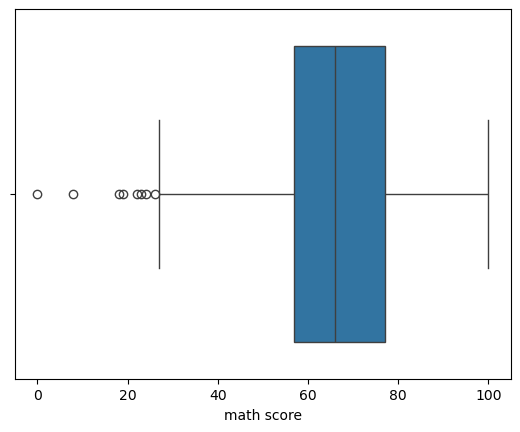

In [25]:
#boxplot
sns.boxplot(x="math score",data=hari)
plt.show()

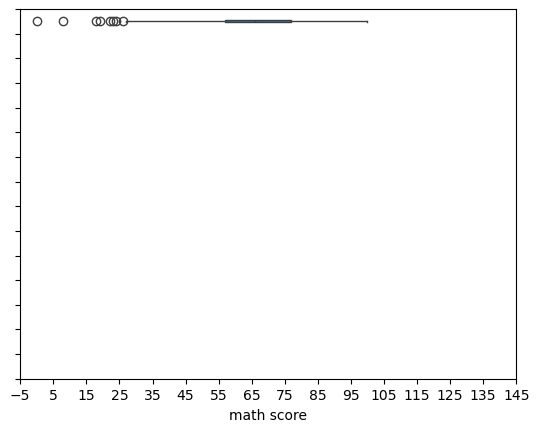

In [26]:
bins=np.arange(-5,150,10)
sns.boxplot(x="math score",data=hari)
plt.xticks(bins)
plt.yticks(bins)
plt.show()

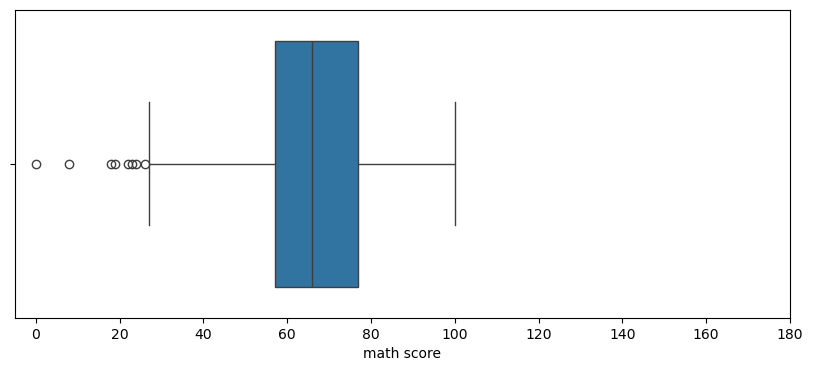

In [27]:
 plt.figure(figsize=(10,4))
 sns.boxplot(x="math score", data=hari)
 plt.xticks(np.arange(0,200,20))
 plt.show()

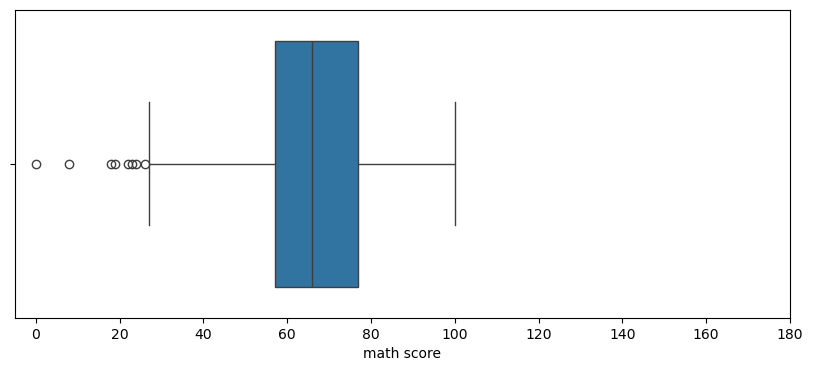

In [28]:

 plt.figure(figsize=(10,4))
 sns.boxplot(x="math score", data=hari)
 plt.xticks(np.arange(0,200,20))
 plt.show()

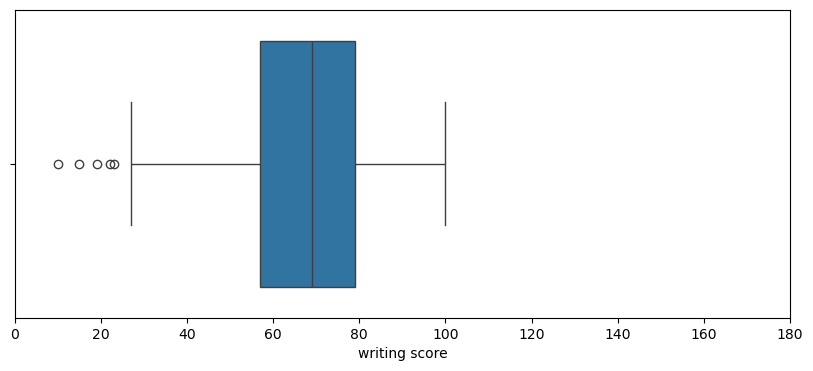

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(x="writing score", data=hari)
plt.xticks(np.arange(0,200,20))
plt.show()

In [32]:
#z-score
def trim(col:pd.core.series.Series):
     lowerlimit=col.mean()-3*col.std()
     upperlimit=col.mean()+3*col.std()
     new_col = col[(col<upperlimit)&(col>lowerlimit)]
     return new_col

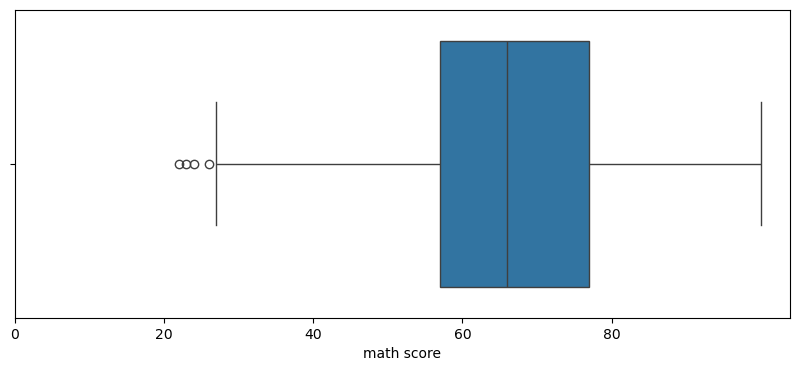

In [34]:
plt.figure(figsize=(10,4))
sns.boxplot(x=trim(hari["math score"]),data=hari)
plt.xticks(np.arange(0,100,20))
plt.show()

In [35]:
 #minmax scaler
 #standard scaler
 from sklearn.preprocessing import MinMaxScaler

In [36]:
 scaler=MinMaxScaler()

In [37]:
hari["reading score"]=scaler.fit_transform(hari[["reading score"]])

In [38]:
hari

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,0.662651,74.0
1,female,group C,some college,standard,completed,69.0,0.879518,88.0
2,female,group B,master's degree,standard,none,90.0,0.939759,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,0.481928,44.0
4,male,group C,some college,standard,none,76.0,0.734940,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,0.987952,95.0
996,male,group C,high school,free/reduced,none,62.0,0.457831,55.0
997,female,group C,high school,free/reduced,completed,59.0,0.650602,65.0
998,female,group D,some college,standard,completed,68.0,0.734940,77.0


In [39]:
hari["math score"]=scaler.fit_transform(hari[["math score"]])

In [40]:
hari

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,74.0
1,female,group C,some college,standard,completed,0.69,0.879518,88.0
2,female,group B,master's degree,standard,none,0.90,0.939759,93.0
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,44.0
4,male,group C,some college,standard,none,0.76,0.734940,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.88,0.987952,95.0
996,male,group C,high school,free/reduced,none,0.62,0.457831,55.0
997,female,group C,high school,free/reduced,completed,0.59,0.650602,65.0
998,female,group D,some college,standard,completed,0.68,0.734940,77.0


In [41]:
hari["writing score"]=scaler.fit_transform(hari[["writing score"]])

In [42]:
hari

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,0.76,0.734940,0.722222
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.88,0.987952,0.944444
996,male,group C,high school,free/reduced,none,0.62,0.457831,0.500000
997,female,group C,high school,free/reduced,completed,0.59,0.650602,0.611111
998,female,group D,some college,standard,completed,0.68,0.734940,0.744444
